In [1]:
#  there are two methods to change the numerical data to categorical data
# 1.Discetization (Benning)
# 2 .Binaryization 


In [ ]:
# Discretization :
 # it is the process of transformation continus variable into discrete 
#  variavble by creating a set of contigous intrvals that span the range of the variable 
# values .Discrete is also called binning , where bin is an alterantive name for interval

In [2]:
# why use 
# 1.to handle outliers
# 2. to improve the value

In [3]:
# type if discretization 
# 1 .unsuperivsed 
   # a. equal width :- it divided it inot equla interval 
   #b. equal frequncy: it will divide the inteval in the basis of the population in equal percentalge

   #c. K mean: 

 # 2. supervised 
    # a.Decsion Tree Binning 
# 3 . cusom 


In [4]:
import pandas as pd
import numpy as np

In [5]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [6]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(714, 3)

In [9]:
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [10]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:


clf = DecisionTreeClassifier()



In [13]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [15]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [17]:
np.mean(cross_val_score(clf,X,y,scoring='accuracy'))

0.6232443612725302

In [36]:
kbin_age = KBinsDiscretizer(n_bins = 15 ,encode ='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins = 15 ,encode ='ordinal',strategy='quantile')


In [38]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [39]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [40]:
trf.named_transformers_['first'].n_bins_

array([15])

In [41]:
trf.named_transformers_['second'].bin_edges_


array([array([  0.    ,   7.25  ,   7.775 ,   7.8958,   8.1583,  10.5   ,
               13.    ,  14.4542,  18.75  ,  26.    ,  26.55  ,  31.275 ,
               51.4792,  76.2917, 108.9   , 512.3292])                   ],
      dtype=object)

In [42]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})


In [43]:
output

,age,age_trf,fare,fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0
...,...,...,...,...
92,46.0,12.0,61.1750,12.0
134,25.0,6.0,13.0000,6.0
337,41.0,11.0,134.5000,14.0
548,33.0,9.0,20.5250,8.0


In [44]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())


In [45]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)


In [46]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [47]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6317097026604068

In [49]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()


0.6344679186228481


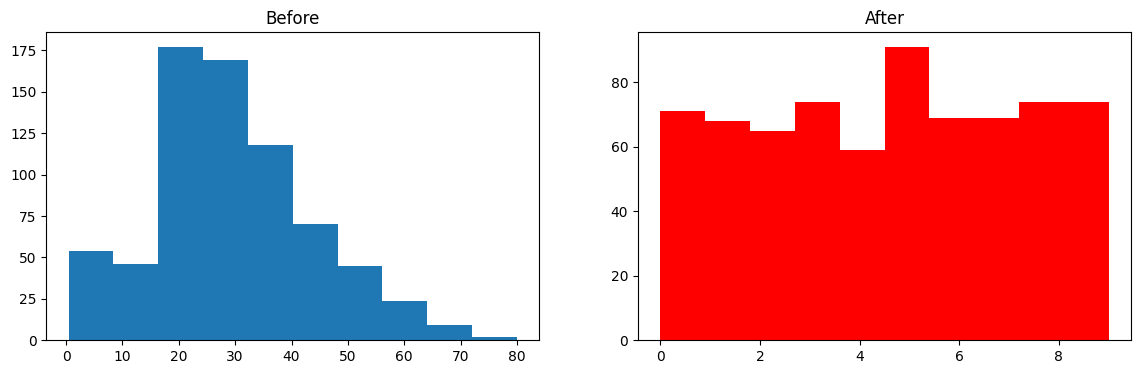

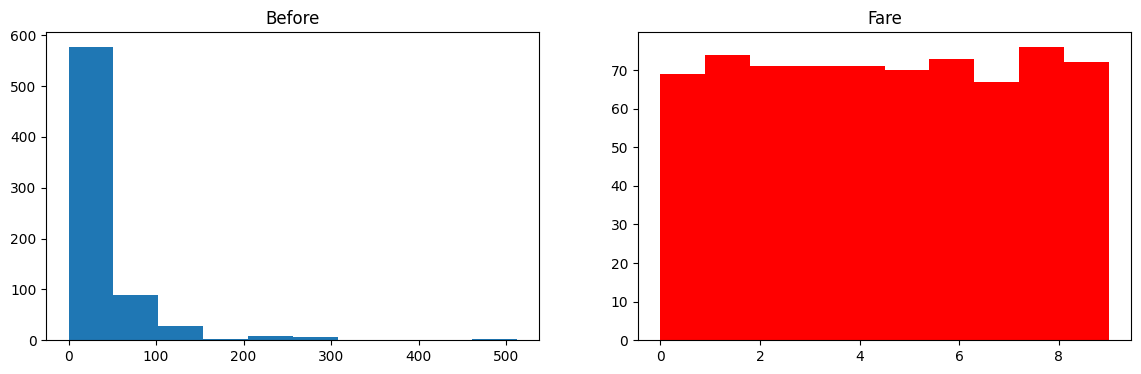

In [52]:
discretize(10,'quantile')


/home/anubhav/.local/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6317292644757433


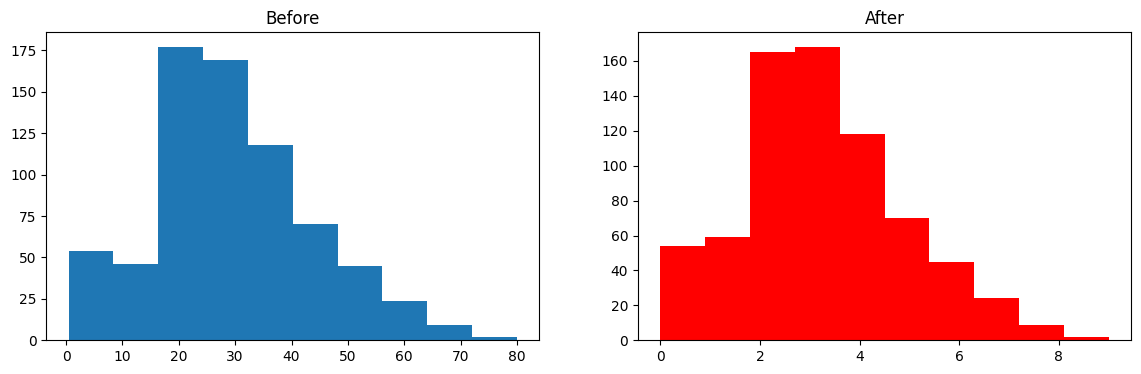

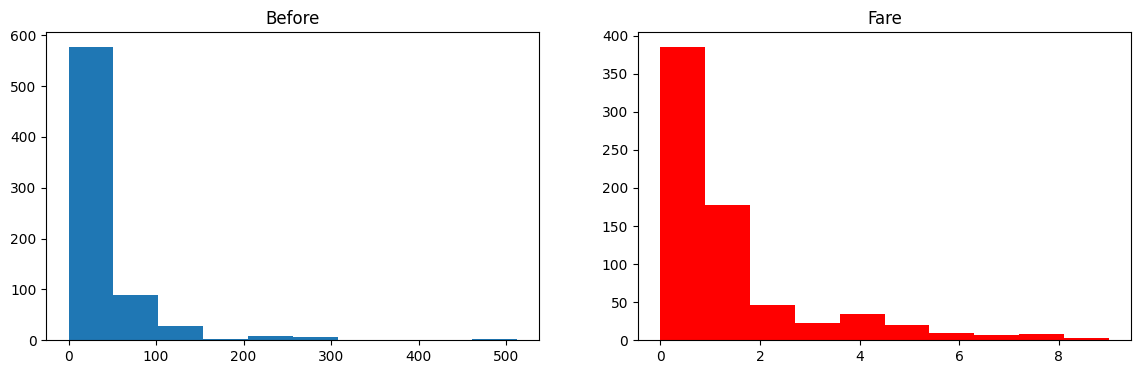

In [55]:
discretize(10,'kmeans')


/home/anubhav/.local/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/home/anubhav/.local/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


0.6331377151799686


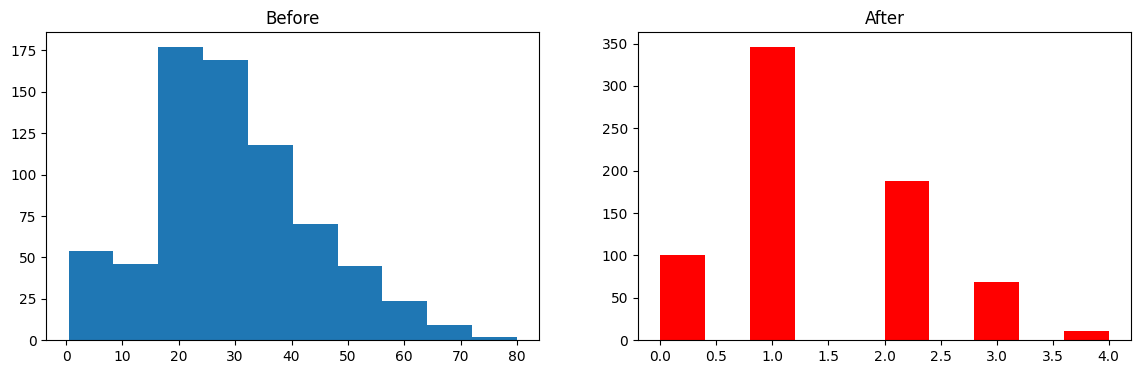

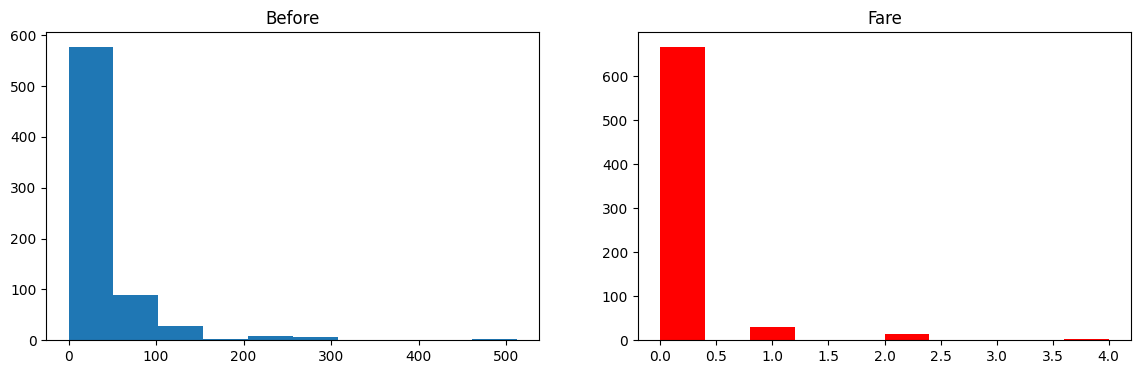

In [58]:
discretize(5,'uniform')


# custom of domain based binning 

In [ ]:
we can create our own custom interval  by our own knowledge 


In [ ]:
## BInarization 
Binzrzd in sklearn 

In [82]:
import numpy as np
import pandas as pd


In [83]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

from sklearn.compose import ColumnTransformer

In [88]:
df = pd.read_csv('train.csv')[['Age','Fare','SibSp','Parch','Survived']]
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [90]:
df.dropna(inplace=True)
df['family'] = df['SibSp'] + df['Parch']


In [91]:
df.drop(columns=['SibSp','Parch'],inplace=True)


In [92]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [94]:
X_train.head()

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [95]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6293706293706294

In [96]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.652699530516432

In [97]:
# Applying Binarization

from sklearn.preprocessing import Binarizer


In [98]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')

In [99]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)


In [100]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])


,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [114]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6223776223776224

In [132]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6346048513302034